In [1]:
import numpy as np
import cv2
import os
from tqdm import tqdm
from matplotlib import pyplot as plt

c:\users\lenovo\anaconda3\envs\deeplearning\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\users\lenovo\anaconda3\envs\deeplearning\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
c:\users\lenovo\anaconda3\envs\deeplearning\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


# Datensatz erstellen

In [4]:
#constants for noise
mean = 0.0  
std = 1.0    

images_without_noise = []
images_with_noise = []

target_size = (480, 480)

for filepath in tqdm(os.listdir('COCO_smaller/')):
    
    #resize image and save
    img_bgr = cv2.imread('COCO_smaller/{0}'.format(filepath))
    img_bgr = cv2.resize(img_bgr, target_size)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    
    cv2.imwrite('COCO_crop/'+ filepath, img_rgb) 
    images_without_noise.append(img_rgb)
    
    #add noise and save    
    noise_image = img_rgb + np.random.normal(mean, std, img_rgb.shape)*(255/4)
    noise_image = np.clip(noise_image, 0, 255).astype(int)
    images_with_noise.append(noise_image)
    cv2.imwrite('COCO_noise/'+ filepath, noise_image) 
    
images_without_noise = np.asarray(images_without_noise)
images_with_noise = np.asarray(images_with_noise)

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [01:19<00:00,  6.29it/s]


In [ ]:
#erstellen mit weniger Daten aber Größer
mean = 0.0   # some constant
std = 1.0    # some constant (standard deviation)

images_without_noise = []
images_with_noise = []

for filepath in tqdm(os.listdir('COCO_smaller/')):
    img_bgr = cv2.imread('COCO_smaller/{0}'.format(filepath))
    img_bgr = cv2.resize(img_bgr, (480, 480))
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    
    #crop_img = img_rgb[0:480, 0:480]
    cv2.imwrite('COCO_smaller_crop/'+ filepath, img_rgb) 
    images_without_noise.append(img_rgb)
    
    noise_image = img_rgb + np.random.normal(mean, std, img_rgb.shape)*(255/4)
    noise_image = np.clip(noise_image, 0, 255).astype(int)
    images_with_noise.append(noise_image)
    cv2.imwrite('COCO_smaller_noise/'+ filepath, noise_image) 
    
images_without_noise = np.asarray(images_without_noise)
images_with_noise = np.asarray(images_with_noise)

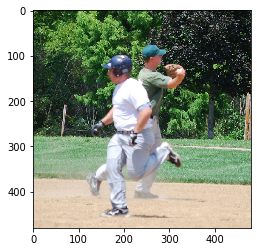

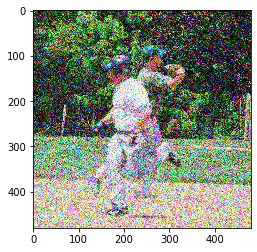

In [5]:
plt.imshow(images_without_noise[1])
plt.show()
plt.imshow(images_with_noise[1])
plt.show()

# Datensatz laden

In [6]:
#load Datasets
images_without_noise = []

for filepath in tqdm(os.listdir('COCO_crop/')):
    image = cv2.imread('COCO_crop/{0}'.format(filepath))
    image = image/255
    images_without_noise.append(image)
    
images_with_noise = []

for filepath in tqdm(os.listdir('COCO_noise/')):
    image = cv2.imread('COCO_noise/{0}'.format(filepath))
    image = image/255
    images_with_noise.append(image)
    
images_without_noise = np.asarray(images_without_noise)
images_with_noise = np.asarray(images_with_noise)

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:09<00:00, 53.71it/s]


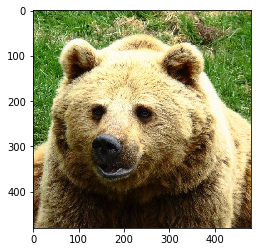

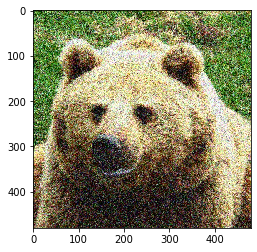

In [7]:
from matplotlib import pyplot as plt

plt.imshow(images_without_noise[0])
plt.show()
plt.imshow(images_with_noise[0])
plt.show()

In [8]:
#split 80/20
split_index = int(len(images_with_noise)*0.8)

x_val = images_with_noise[split_index:]
y_val = images_without_noise[split_index:]
x_train = images_with_noise[:split_index]
y_train = images_without_noise[:split_index]

In [9]:
from tensorflow.keras.layers import Conv2DTranspose, Conv2D, Input
import tensorflow as tf

class Net(tf.keras.Model): 
    def __init__(self):

        super(Net, self).__init__() 

        self.encoder = tf.keras.Sequential([ 
          Input(shape=(480, 480, 3)), 
          Conv2D(32, (3,3), activation='relu', padding='same', strides=2), 
          Conv2D(16, (3,3), activation='relu', padding='same', strides=2),
          #Conv2D(16, (3,3), activation='relu', padding='same', strides=1)
        ]) 
    
        self.decoder = tf.keras.Sequential([ 
          #Conv2DTranspose(16, kernel_size=3, strides=1, activation='relu', padding='same'),
          Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'), 
          Conv2DTranspose(32, kernel_size=3, strides=2, activation='relu', padding='same'), 
          Conv2D(3, kernel_size=(3,3), activation='sigmoid', padding='same')]) 
        
    def call(self, x): 
        encoded = self.encoder(x) 
        decoded = self.decoder(encoded) 
        return decoded

In [10]:
model = Net()
model.compile(optimizer='adam', loss='mse')

In [11]:
model.fit(x_train, y_train, 
                epochs=5, 
                validation_data=(x_val, y_val))

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing th

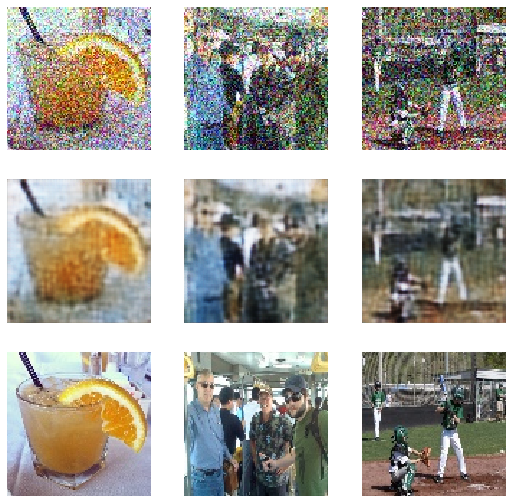

In [89]:
encoded_imgs=model.encoder(x_val[:15]).numpy()
decoded_imgs=model.decoder(encoded_imgs)

fig = plt.figure(figsize=(9,9))

fig.add_subplot(3, 3, 1)
plt.imshow(tf.squeeze(x_val[2]))
plt.axis('off')

fig.add_subplot(3, 3, 4)
plt.imshow(tf.squeeze(decoded_imgs[2]))
plt.axis('off')

fig.add_subplot(3, 3, 7)
plt.imshow(tf.squeeze(y_val[2]))
plt.axis('off')


fig.add_subplot(3, 3, 2)
plt.imshow(tf.squeeze(x_val[1]))
plt.axis('off')

fig.add_subplot(3, 3, 5)
plt.imshow(tf.squeeze(decoded_imgs[1]))
plt.axis('off')

fig.add_subplot(3, 3, 8)
plt.imshow(tf.squeeze(y_val[1]))
plt.axis('off')


fig.add_subplot(3, 3, 3)
plt.imshow(tf.squeeze(x_val[14]))
plt.axis('off')

fig.add_subplot(3, 3, 6)
plt.imshow(tf.squeeze(decoded_imgs[14]))
plt.axis('off')

fig.add_subplot(3, 3, 9)
plt.imshow(tf.squeeze(y_val[14]))
plt.axis('off')

plt.show()